In [1]:
#https://github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/tutorials/mnist/input_data.py

"""Functions for downloading and reading MNIST data."""
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import gzip
import os
import tempfile

import numpy
from six.moves import urllib
from six.moves import xrange  # pylint: disable=redefined-builtin
import tensorflow as tf
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets

/Users/r3dmaohong/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
import numpy as np
import matplotlib.pyplot as plt

mnist_images = read_data_sets('MNIST_data/', one_hot = False)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
mnist_images.train.next_batch(10)

(array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32),
 array([6, 6, 6, 1, 0, 3, 8, 5, 4, 3], dtype=uint8))

In [4]:
pixels, real_values = mnist_images.train.next_batch(10)

In [5]:
print('list of values loaded ', real_values)

list of values loaded  [4 5 1 0 0 7 4 8 4 8]


title:  7


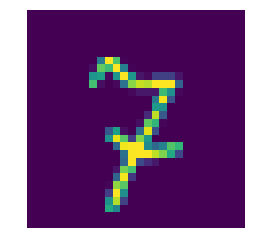

In [9]:
example_to_visualize = 5

print('title: ', real_values[example_to_visualize])
image = pixels[example_to_visualize,:]
image = np.reshape(image, [28, 28])
plt.axis('off')
plt.imshow(image)
plt.show()

In [ ]:
# one_hot = False

In [50]:
train_pixels, train_list_values = mnist_images.train.next_batch(100)

In [51]:
test_pixels, test_list_values = mnist_images.test.next_batch(10)

In [52]:
train_pixel_tensor = tf.placeholder('float', [None, 784]) #28 * 28
test_pixel_tensor = tf.placeholder('float', [784])

In [53]:
# knn
distance = tf.reduce_sum(tf.abs( tf.add(train_pixel_tensor, tf.negative(test_pixel_tensor)) ), reduction_indices=1)

In [54]:
pred = tf.argmin(input=distance, axis=0)

In [61]:
accuracy = 0.

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for i in range(len(test_list_values)):
        nn_index = sess.run(pred, \
                            feed_dict={train_pixel_tensor:train_pixels, \
                                       test_pixel_tensor:test_pixels[i,:]})
        print('test ', i, '; predicted class: ', train_list_values[nn_index], \
              'true class: ', test_list_values[i])
        if train_list_values[nn_index]==test_list_values[i]: 
            accuracy+=1./len(test_pixels)
    print("Accuracy: ", accuracy)

test  0 ; predicted class:  1 true class:  2
test  1 ; predicted class:  6 true class:  6
test  2 ; predicted class:  3 true class:  5
test  3 ; predicted class:  9 true class:  9
test  4 ; predicted class:  2 true class:  2
test  5 ; predicted class:  3 true class:  3
test  6 ; predicted class:  5 true class:  5
test  7 ; predicted class:  4 true class:  4
test  8 ; predicted class:  2 true class:  2
test  9 ; predicted class:  3 true class:  3
Accuracy:  0.7999999999999999


In [ ]:
# one_hot = True

In [62]:
mnist_images = read_data_sets('MNIST_data/', one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [63]:
train_pixels, train_list_values = mnist_images.train.next_batch(100)

In [64]:
test_pixels, test_list_values = mnist_images.test.next_batch(10)

In [65]:
train_pixel_tensor = tf.placeholder('float', [None, 784]) #28 * 28
test_pixel_tensor = tf.placeholder('float', [784])

In [66]:
# knn
distance = tf.reduce_sum(tf.abs( tf.add(train_pixel_tensor, tf.negative(test_pixel_tensor)) ), reduction_indices=1)

In [67]:
pred = tf.argmin(input=distance, axis=0)

In [68]:
accuracy = 0.

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for i in range(len(test_list_values)):
        nn_index = sess.run(pred, \
                            feed_dict={train_pixel_tensor:train_pixels, \
                                       test_pixel_tensor:test_pixels[i,:]})
        print('test ', i, '; predicted class: ', np.argmax(train_list_values[nn_index]), \
              'true class: ', np.argmax(test_list_values[i]))
        if np.argmax(train_list_values[nn_index])==np.argmax(test_list_values[i]): 
            accuracy+=1./len(test_pixels)
    print("Accuracy: ", accuracy)

test  0 ; predicted class:  3 true class:  3
test  1 ; predicted class:  8 true class:  8
test  2 ; predicted class:  1 true class:  1
test  3 ; predicted class:  1 true class:  4
test  4 ; predicted class:  1 true class:  1
test  5 ; predicted class:  1 true class:  1
test  6 ; predicted class:  5 true class:  2
test  7 ; predicted class:  1 true class:  1
test  8 ; predicted class:  0 true class:  0
test  9 ; predicted class:  3 true class:  3
Accuracy:  0.7999999999999999


In [60]:
train_list_values

6